# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [15]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import training test
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#Read in dataframe
df = pd.read_csv("Video Game Sales (Cleaned).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1907 non-null   int64  
 1   index          1907 non-null   int64  
 2   Rank           1907 non-null   int64  
 3   Game Title     1907 non-null   object 
 4   Platform       1907 non-null   object 
 5   Year           1907 non-null   float64
 6   Genre          1907 non-null   object 
 7   Publisher      1907 non-null   object 
 8   North America  1907 non-null   float64
 9   Europe         1907 non-null   float64
 10  Japan          1907 non-null   float64
 11  Rest of World  1907 non-null   float64
 12  Global         1907 non-null   float64
 13  Review         1907 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 208.7+ KB


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

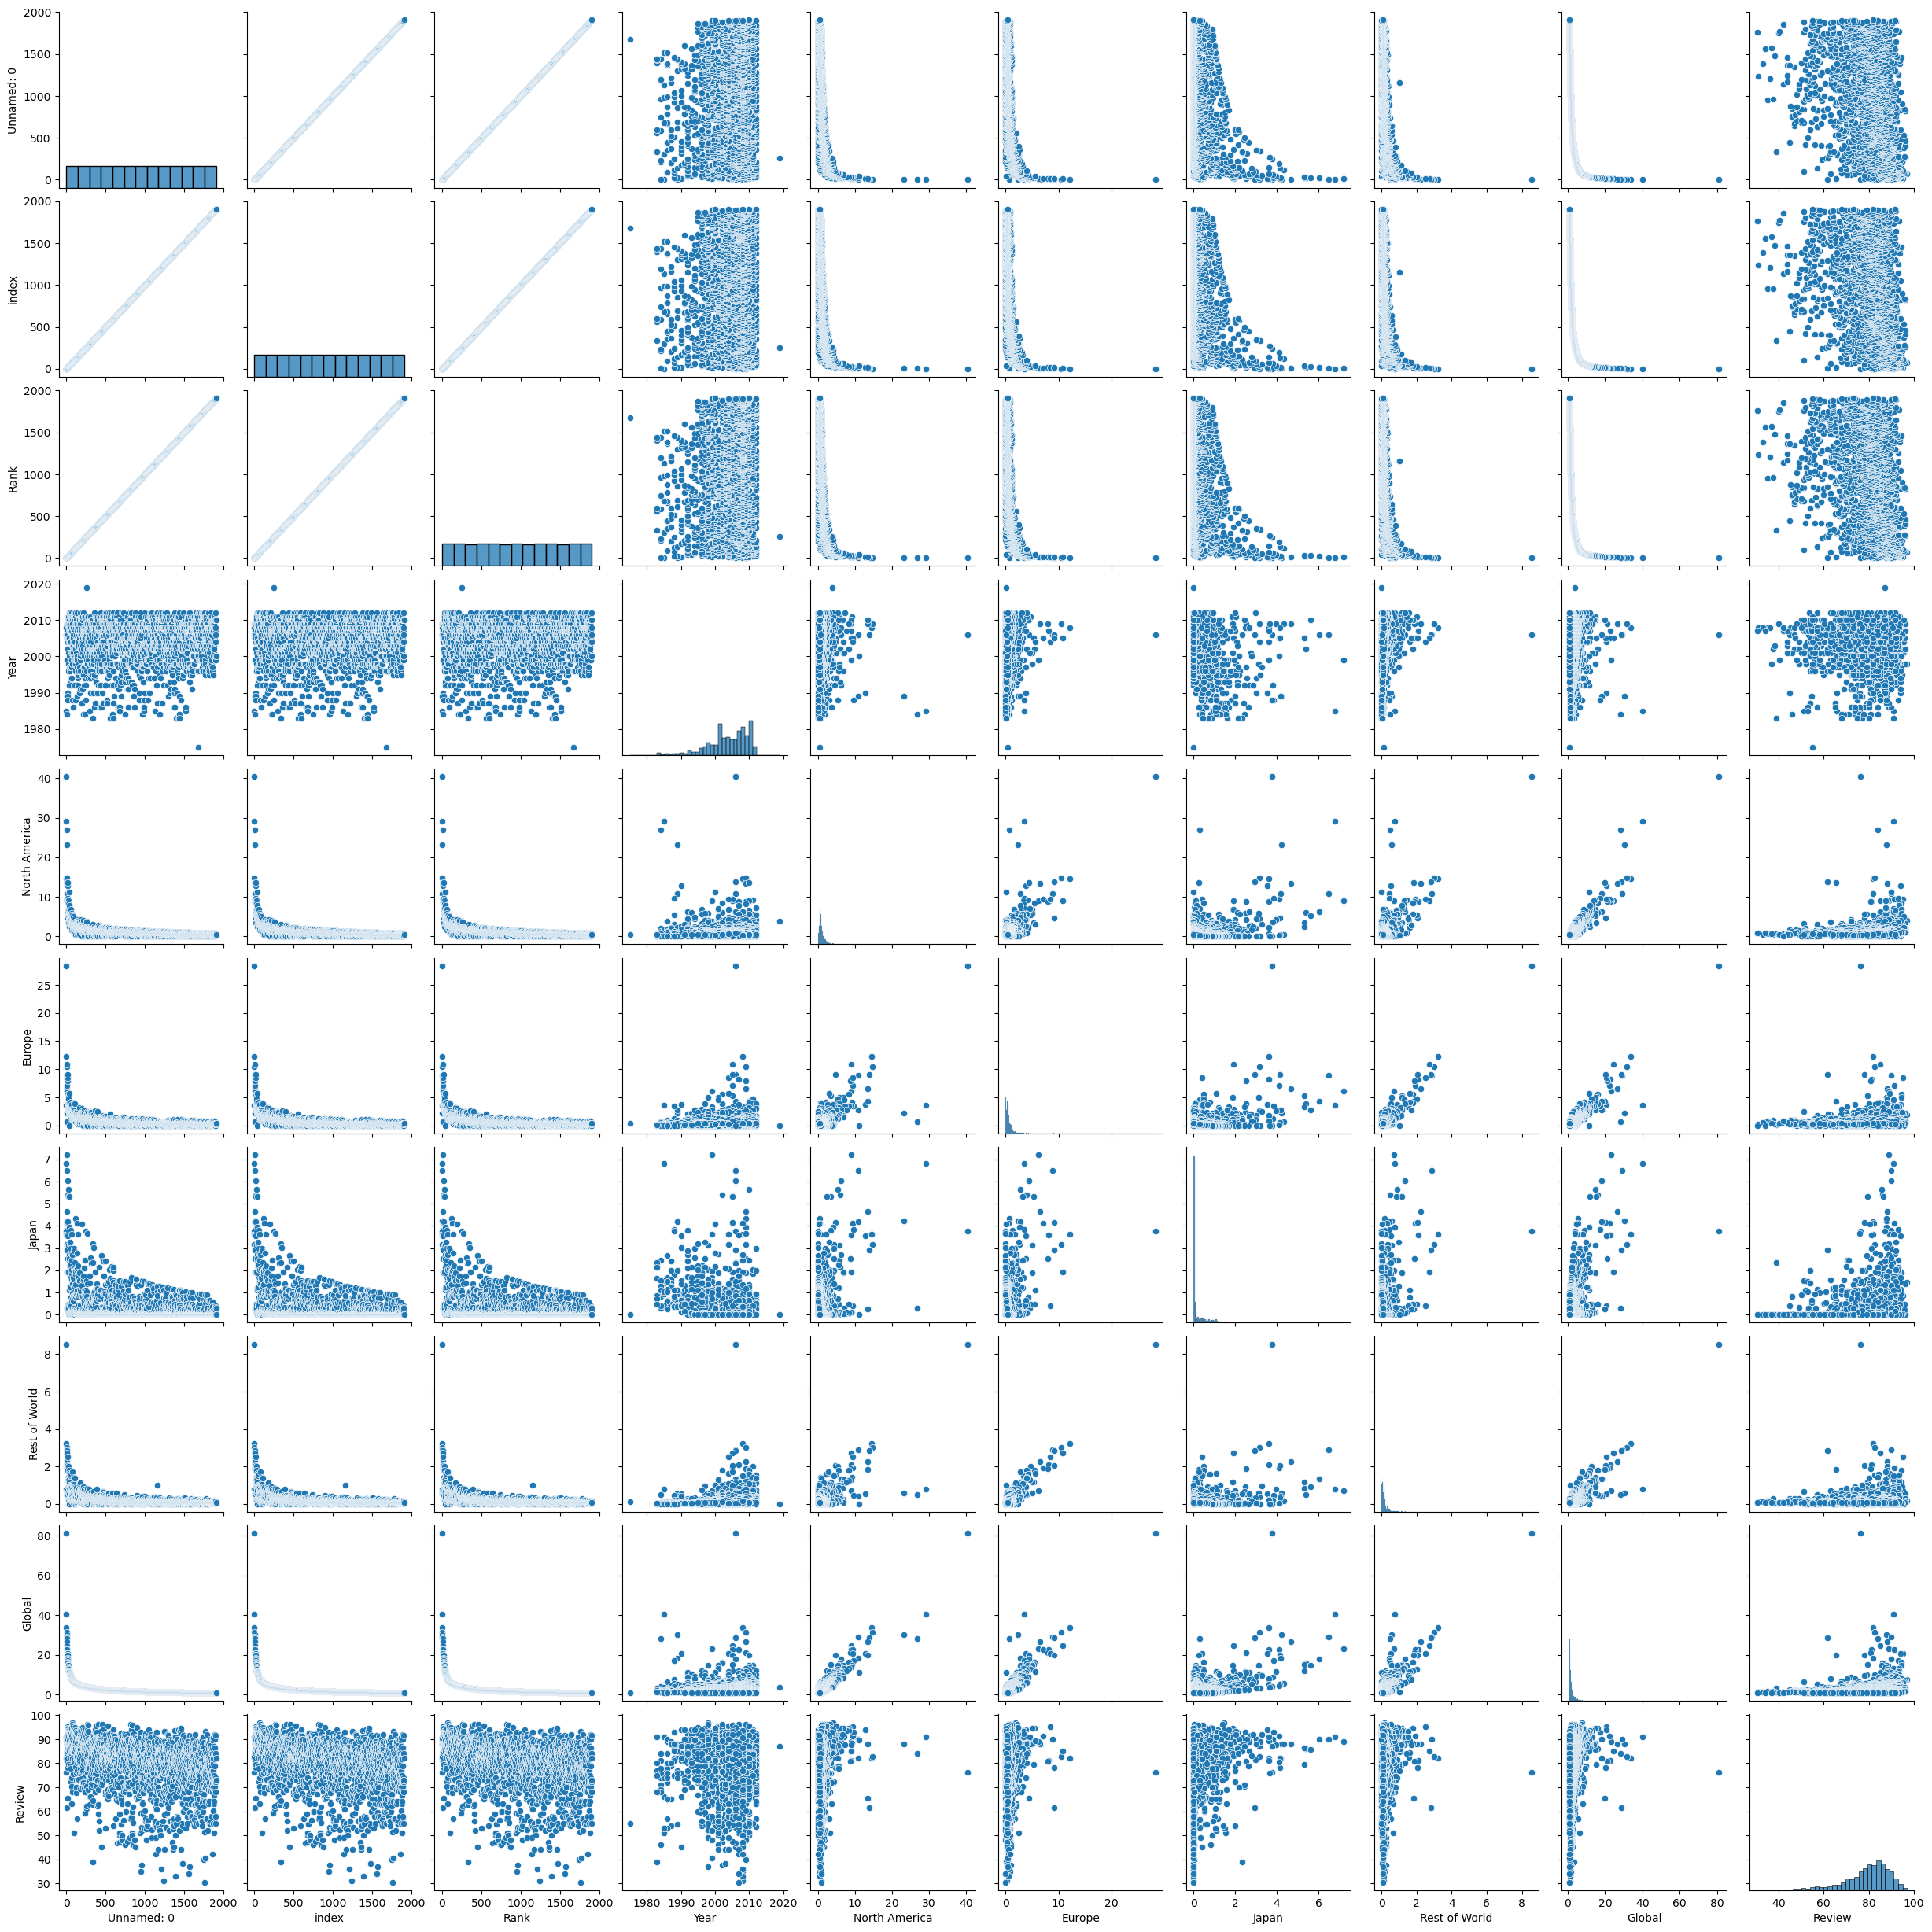

In [16]:
# Using pairplot we'll visualize the data for correlation

sns.pairplot(df)
plt.show()

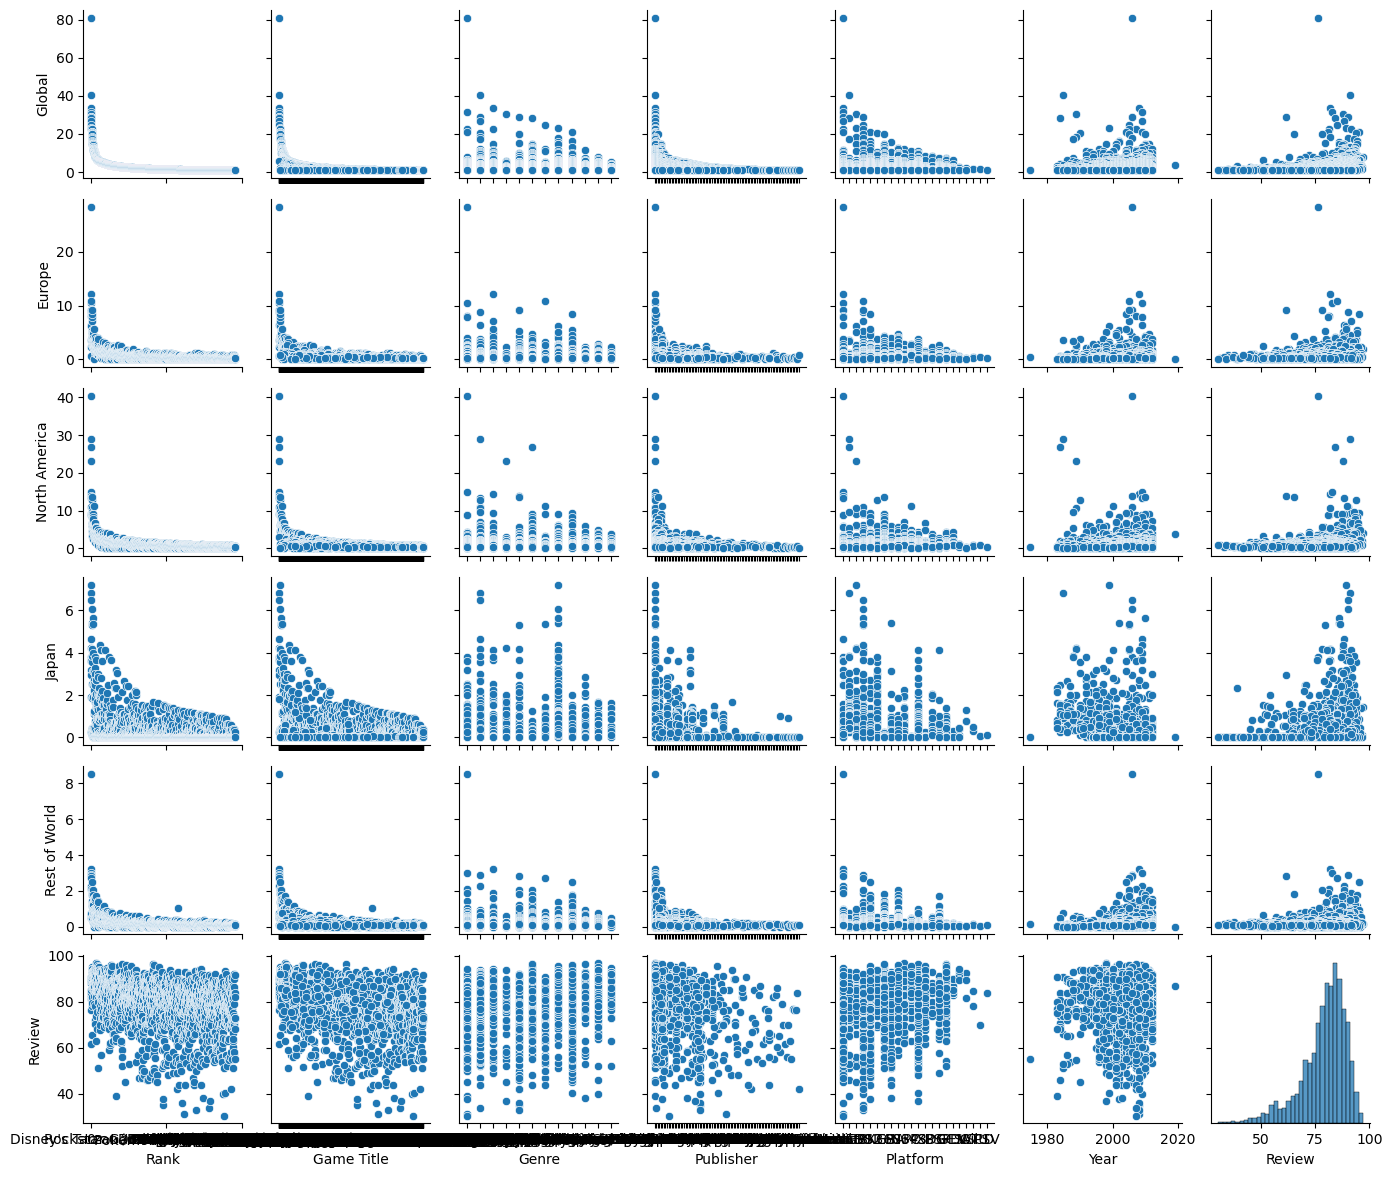

In [18]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['Rank', 'Game Title','Genre','Publisher', 'Platform','Year', 'Review'], 
             y_vars=['Global','Europe', 'North America', 'Japan', 'Rest of World', 'Review'], size = 2, aspect=1, kind='scatter')
plt.show()

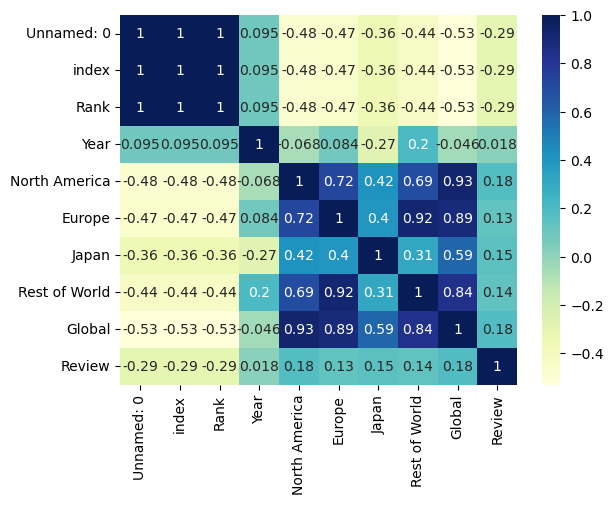

In [17]:
# Visualizing the data using heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [19]:
# Step 1 is to assign your x and y

x = df['Year']
y = df['Europe']

# Step 2 is to create your train and test sets
# Splitting the varaibles as training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
print('x-train sets')
print(X_train)
print('y-train sets')
y_train

x-train sets
549     2012.0
1345    2006.0
1525    2003.0
1126    2003.0
377     2001.0
         ...  
1879    2003.0
1895    1999.0
1859    2008.0
792     2004.0
1544    2011.0
Name: Year, Length: 1334, dtype: float64
y-train sets


549     0.65
1345    0.04
1525    0.40
1126    0.35
377     0.86
        ... 
1879    0.32
1895    0.32
1859    0.14
792     0.95
1544    0.43
Name: Europe, Length: 1334, dtype: float64

In [20]:
# Step 3 is to build the model.
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const   -34.840238
Year      0.017745
dtype: float64

In [21]:
# Performing a summary to list out all the different parameters of the regression line fitted
# The coefficient for Year is 0.0177
#The corresponding p-value is 0.02
# The R-squared value is 0.007 which means that 0.7% of the Europe 'sales' variance can be explained by Year column using
#this line
#Prob F-statistics has a r low value but not zero
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Europe   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     9.812
Date:                Sun, 05 Mar 2023   Prob (F-statistic):            0.00177
Time:                        13:32:33   Log-Likelihood:                -2176.0
No. Observations:                1334   AIC:                             4356.
Df Residuals:                    1332   BIC:                             4366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.8402     11.351     -3.069      0.002     -57.108     -12.572
Year           0.0177      0.006      3.132      0.002       0.007       0.029
==============================================================================
Omnibus:                     2269.864   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2284849.213
Skew:                          11.018   Prob(JB):                         0.00
Kurtosis:                     204.547   Cond. No.                     6.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

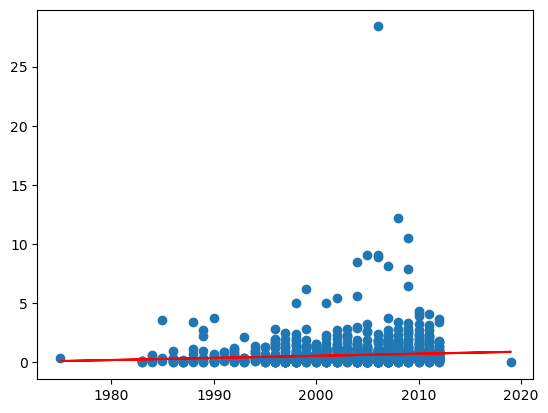

In [22]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, -34.84 + 0.0177*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

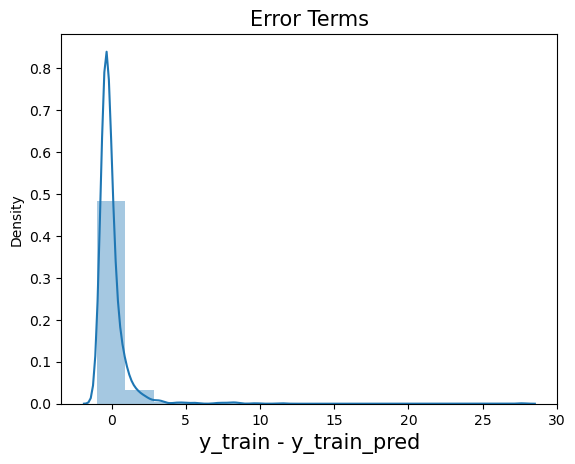

In [23]:
# Step 4 is to perform residual analysis

# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
#The residuals do show a normal distribution with a mean of zero
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.0.007
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? No
3. Was your plot of the error terms a bell curve? No it has a positive skewness